# Analisando as vendas

In [6]:
import pandas as pd

In [9]:
alucar = pd.read_csv('dados/alucar.csv')

In [10]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [11]:
alucar.shape

(24, 2)

In [13]:
print(f'Quantidade de dados nulos: {alucar.isna().sum()}')

Quantidade de dados nulos: mes       0
vendas    0
dtype: int64


In [14]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [15]:
alucar['mes'] = pd.to_datetime(alucar['mes'])
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [17]:
import seaborn as sns

In [18]:
%matplotlib inline
from matplotlib import pyplot as plt

In [19]:
print(sns.__version__)

0.13.2


<Axes: xlabel='mes', ylabel='vendas'>

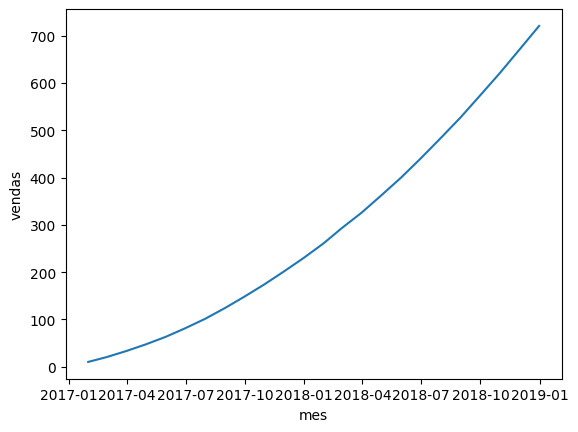

In [20]:
sns.lineplot(x='mes', y='vendas', data=alucar)

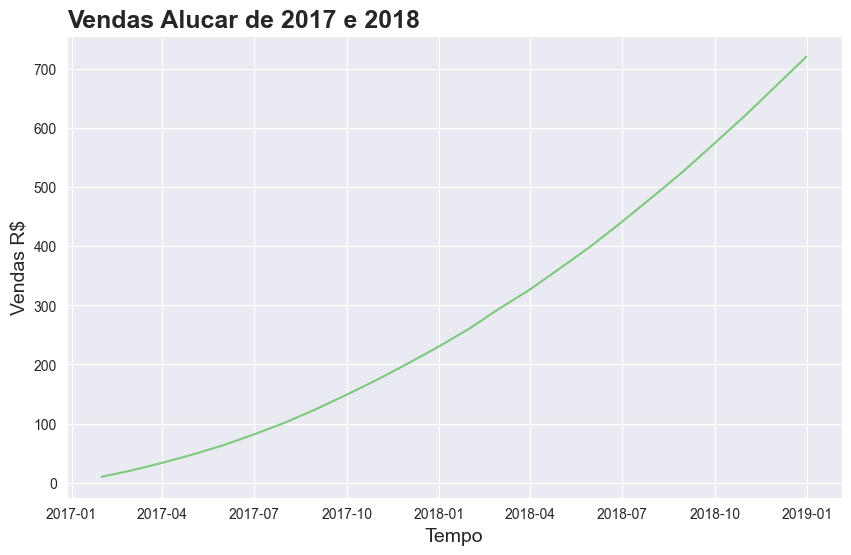

In [29]:
sns.set_palette('Accent')
sns.set_style('darkgrid')

ax = sns.lineplot(x='mes', y='vendas', data=alucar)
ax.figure.set_size_inches(10,6)
ax.set_title('Vendas Alucar de 2017 e 2018', loc='left', fontsize=18, weight='bold')
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Vendas R$', fontsize=14)
ax = ax

In [30]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


## Decomposição das vendas

In [31]:
alucar['aumento'] = alucar['vendas'].diff()
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


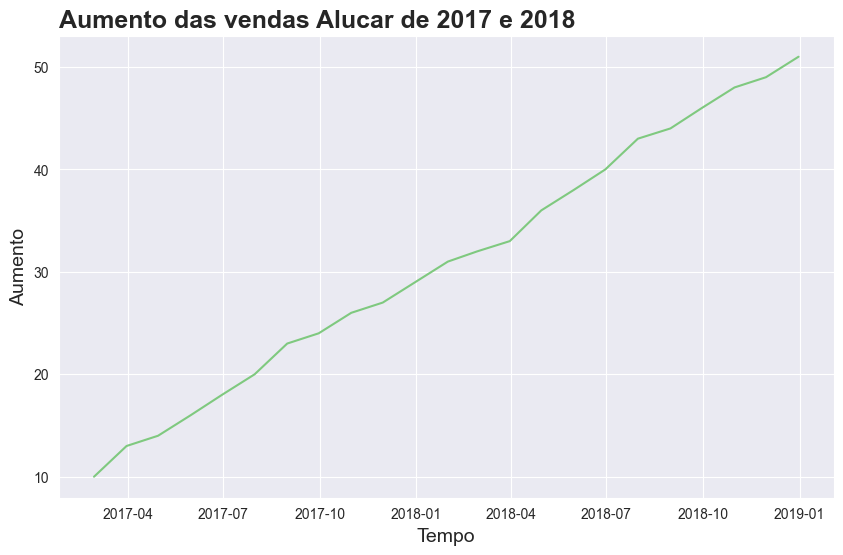

In [36]:
sns.set_palette('Accent')
sns.set_style('darkgrid')

ax = sns.lineplot(x='mes', y='aumento', data=alucar)
ax.figure.set_size_inches(10,6)
ax.set_title('Aumento das vendas Alucar de 2017 e 2018', loc='left', fontsize=18, weight='bold')
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Aumento', fontsize=14)
ax = ax

Criando uma função para plotar gráficos

In [37]:
def plotar(titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')

    ax = sns.lineplot(x=x, y=y, data=alucar)
    ax.figure.set_size_inches(10,6)
    ax.set_title(titulo, loc='left', fontsize=18, weight='bold')
    ax.set_xlabel(labelx, fontsize=14)
    ax.set_ylabel(labely, fontsize=14)
    ax = ax

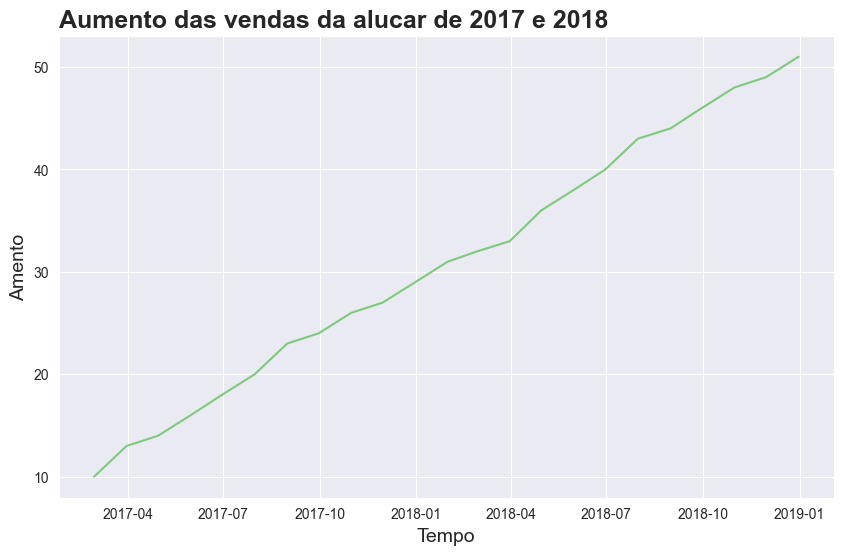

In [39]:
plotar('Aumento das vendas da alucar de 2017 e 2018', 'Tempo', 'Amento',
       'mes', 'aumento', alucar)

Decompondo novamente o dataset

In [40]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


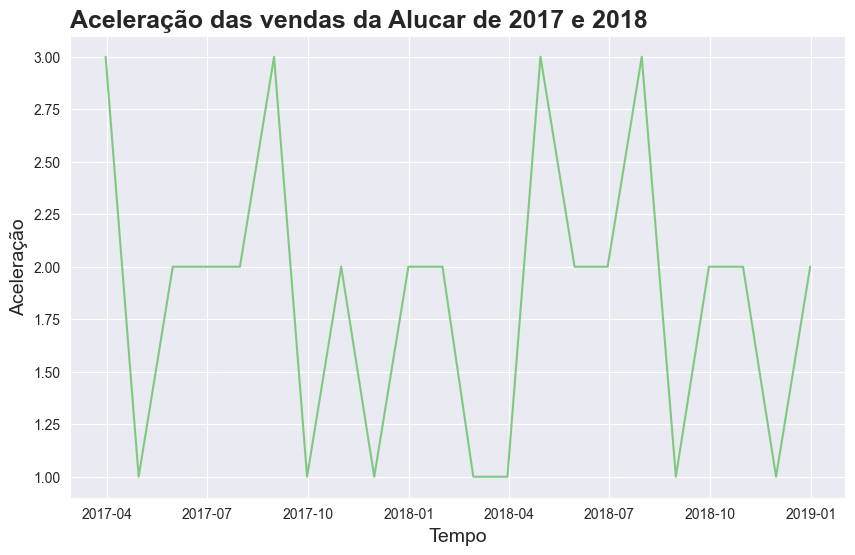

In [42]:
plotar('Aceleração das vendas da Alucar de 2017 e 2018', 'Tempo', 'Aceleração', 'mes', 'aceleracao', alucar)